In [343]:
import numpy as np
import pandas as pd

In [303]:
train = pd.read_csv('titanic_train.csv')

In [304]:
test = pd.read_csv('titanic_test.csv')

In [305]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [306]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

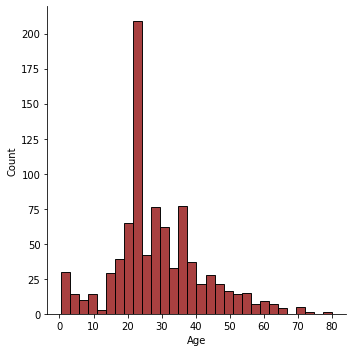

In [338]:
import seaborn as sns
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

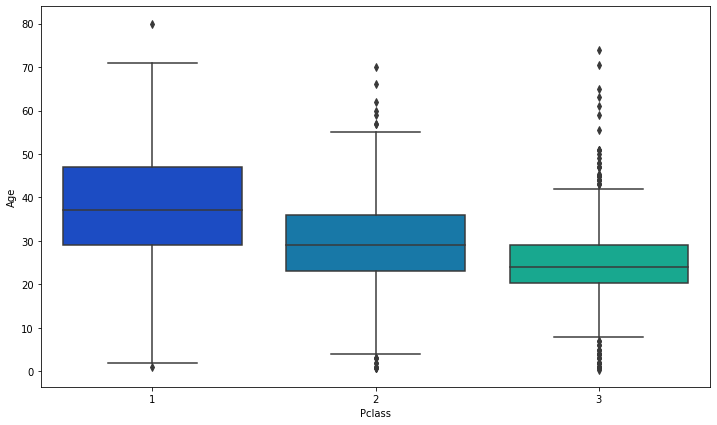

In [334]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [307]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [308]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train.dropna(subset=['Embarked'], axis=0, inplace=True)

In [309]:
X = train.drop(['Name', 'Ticket', 'PassengerId','Cabin','Survived'], axis=1)
y = train['Survived']

In [310]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [311]:
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_validate

numerical_selector = selector(dtype_exclude=object)
categorical_selector = selector(dtype_include=object)

numerical_columns = numerical_selector(X)
categorical_columns = categorical_selector(X)

preprocessor = ColumnTransformer([('numeric', StandardScaler(), numerical_columns), ('categorical', OneHotEncoder(handle_unknown="ignore"), categorical_columns)])
model = make_pipeline(preprocessor, LogisticRegression(C=0.1, max_iter=100))
cv_results = cross_validate(model, X, y, cv=10, scoring='accuracy', return_train_score=True, n_jobs=2)

In [312]:
print("train score: ",cv_results['train_score'].mean()," test score: ",cv_results['test_score'].mean())

train score:  0.8096491885143571  test score:  0.8009320735444332


 Using **train_test_split()** instead of **cross_validate()**

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [330]:
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('logisticregression', LogisticRegression(C=0.1))])

In [331]:
predictions = model.predict(X_test)

In [332]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.87      0.68      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223

